In [1]:
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from scipy.stats import linregress
import cartopy
import mask
import cartopy.crs as ccrs

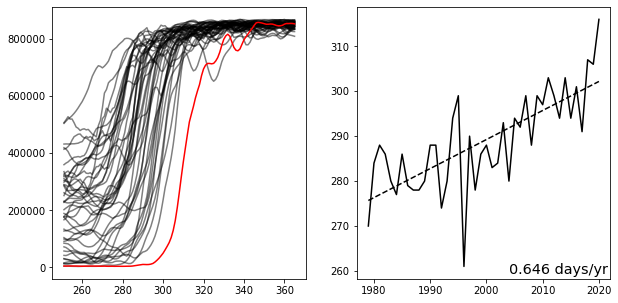

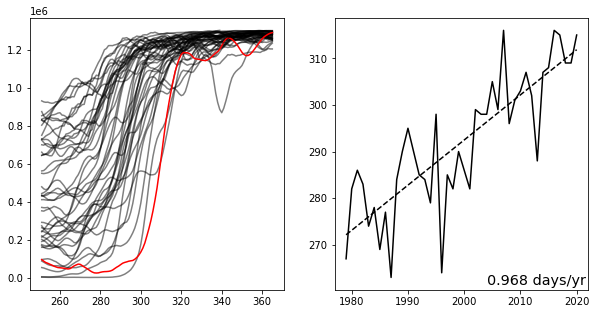

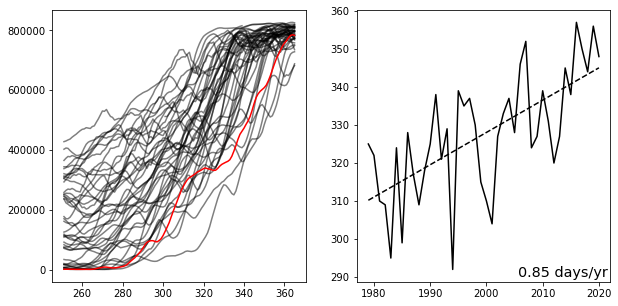

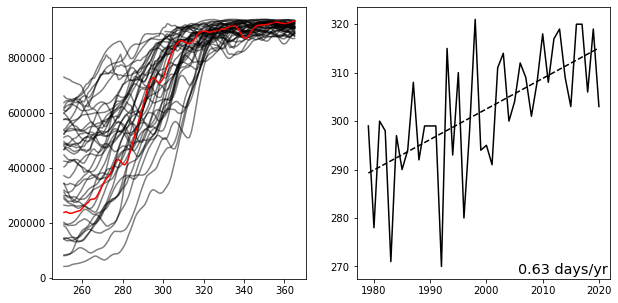

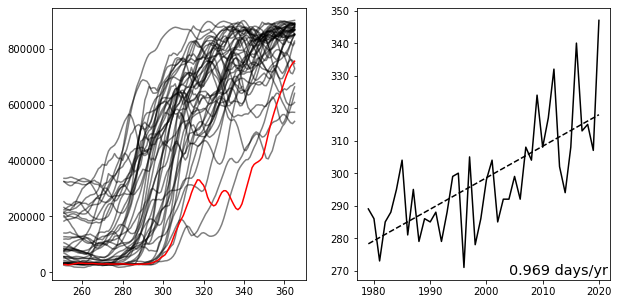

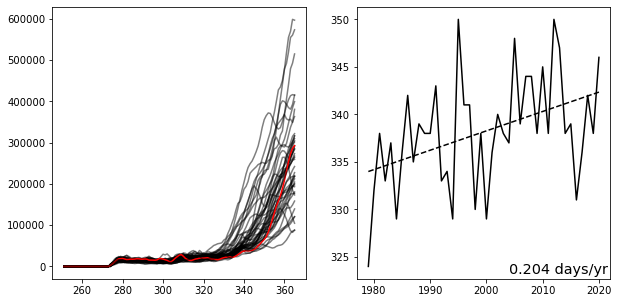

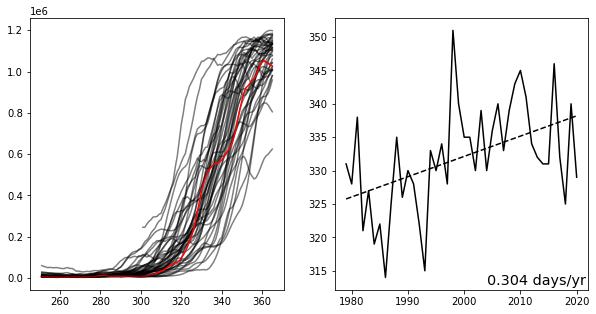

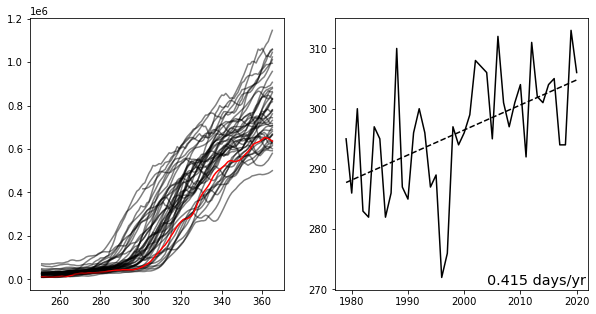

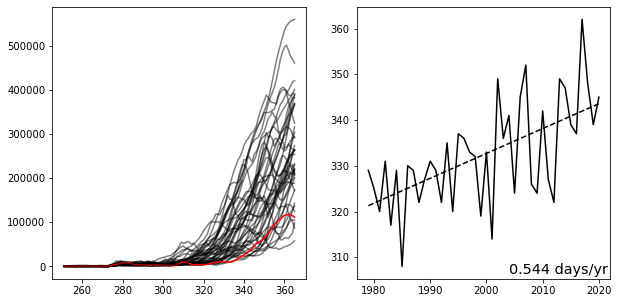

In [45]:
answer_dict = {}

for region, thresh in zip(
                            ['Laptev',
                             'East-Siberian',
                             'Chukchi',
                             'Beaufort',
                             'Kara',
                             'Okhotsk',
                             'Hudson',
                             'Baffin',
                             'Bering',
                            ],
                            [600_000,
                             1_000_000,
                             600_000,
                             800_000,
                             400_000,
                             50_000,
                             400_000,
                             100_000,
                             50_000,
                            ],
                        ):

    df = pd.read_excel('../data/nsidc/N_Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0.xlsx',
                        sheet_name=f'{region}-Area-km^2')
    
#     print(df)

    df.drop(index=59,inplace=True)


    df.drop(columns=['month',   'day'],
            inplace=True)

    df['doy'] = np.arange(1,df.shape[0]+1)
    df.set_index('doy',inplace=True)
    df_late = df.iloc[250:]

    doy_freezeup = []

    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))


    for col in df.columns[:-1]:

        if int(col) == 2020:
            color='r'; alpha=1
        else:
            color='k'; alpha=0.5

        doy_freezeup.append( np.argmax( np.array(df_late[col]) > thresh) + 250)

        ax1.plot(df_late[col],color=color,alpha=alpha)

    x,y = np.array(df.columns[1:-2]).astype(np.float32), np.array(doy_freezeup[1:-1]).astype(np.float32)

    ax2.plot(x, y,color='k')
    
    answer_dict[region] = (x,y)
        

    reg = linregress(x,y)    
        
    ax2.plot([np.min(x),np.max(x)],
             [np.min(x)*reg[0]+reg[1],
              np.max(x)*reg[0]+reg[1] ],
              color='k',ls='--')
    
    ax2.annotate(xy=(0.99,0.02),ha='right',
               text=f'{np.round(reg[0],decimals=3)} days/yr',
               xycoords='axes fraction',
               fontsize='x-large')

    plt.show()


In [3]:
region_codes = {"Lakes":0,
        "Oceans":1,
        "Okhotsk":2,
        "Bering":3,
        "Hudson":4,
        "St Lawrence":5,
        "Baffin":6,
        "Greenland":7,
        "Barents":8,
        "Kara":9,
        "Laptev":10,
        "East Siberian":11,
        "Chukchi":12,
        "Beaufort":13,
        "Canadian Archipelago":14,
        "Central Arctic":15,
        "Land":20,
        "Coast":21}

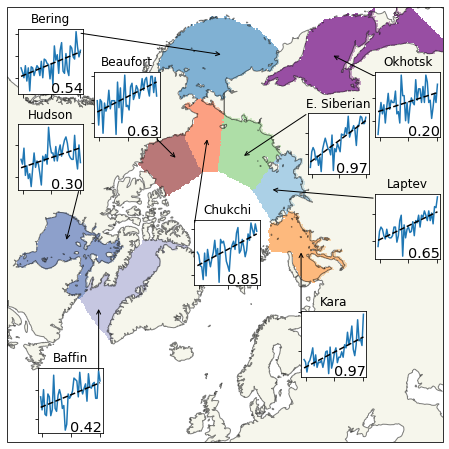

In [48]:
# Import mask data from netcdf

mask_dir = '/home/robbie/Dropbox/Code/mask.nc'
mask_data = mask.get('mask')

lon, lat =np.array(mask.get('lon')), np.array(mask.get('lat'))
my_mask = np.array(mask.get('mask'))

###################################################################

# Define what the colours should be and where the annotations should go


Regions = {
            "Kara":('Oranges',(0.705,0.44)),
            "Laptev":('Blues',(0.65,0.63)),
            "East Siberian":('Greens',(0.58,0.78)),
            "Chukchi":('Reds',(0.353,0.82)),
            "Beaufort":('pink',(0.23,0.72)),
            "Baffin":('Purples',(0.385,0.58)),
            "Hudson":('Set2',(0.63,0.25)),
            "Okhotsk":('Set1',(0.63,0.25)),
            "Bering":('Set3',(0.63,0.25)),
          }

###################################################################

# Make the plot

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())


coords_list = [
                (0.675,0.15), #Kara
                (0.845,0.42), #Laptev
                (0.69,0.615), #East Siberian
                (0.43,0.36), #Chukchi
                (0.025+0.175,0.7), #Beaufort
                (0.07,0.02), #Baffin
                (0.025,0.58), #Hudson
                (0.845,0.7), #Okhotsk
                (0.025,0.8), #Bering
                ]

for region, coords in zip(Regions.keys(), coords_list):
    
    region_mask = np.ones((361,361))
    region_mask[my_mask != region_codes[region]] = np.nan
    if region == 'Baffin': region_mask[lat < 60] = np.nan

    ax.pcolormesh(lon, lat, region_mask[:-1,:-1], cmap=Regions[region][0],
                  vmin=0, vmax = 3,
                  transform=ccrs.PlateCarree())
    
    top = int(arrow_start_top[region])
    right = int(not arrow_start_left[region])
    
    arrow_move_x = arrow_move[region][0]
    arrow_move_y = arrow_move[region][1]
    
    
    
    
    
    ax.annotate('',
                
                xy=(coords[0]+(right*0.14)+arrow_move_x,
                        coords[1]+(top*0.14)+arrow_move_y),
                
                xytext=(coords[0]+(right*0.14),
                        coords[1]+(top*0.14)),
                
                xycoords='axes fraction',
                arrowprops=dict(arrowstyle="->"),
                zorder=10)
    
    if region!='East Siberian':
        inset = ax.inset_axes([coords[0], coords[1],
                               0.15, 0.15])
        x,y = answer_dict[region]
        inset.set_title(region)
        
    else:
        inset = ax.inset_axes([coords[0], coords[1],
                               0.14, 0.14])
        x,y = answer_dict['East-Siberian']
        inset.set_title('E. Siberian')
        
    inset.plot(x,y)
        

    reg = linregress(x,y)    
    

    
    inset.plot([np.min(x),np.max(x)],
             [np.min(x)*reg[0]+reg[1],
              np.max(x)*reg[0]+reg[1] ],
              color='k',ls='--')
    
        
    inset.annotate(xy=(0.99,0.02),ha='right',
               text=f'{reg[0]:.2f}',
               xycoords='axes fraction',
               fontsize='x-large')
    
    
    inset.set_yticklabels([])
    inset.set_xticklabels([])
  
                     
ax.add_feature(cartopy.feature.LAND.with_scale('50m'),
               alpha=0.5,
               edgecolor='black',zorder=1)

ax.set_extent([-180, 180, 90, 50], ccrs.PlateCarree())

    
data_dir = '/home/robbie/Dropbox/Apps/Overleaf/Book_chapter/figs'

plt.savefig(f"{data_dir}/fig_7_c.png",dpi=500, bbox_inches='tight')

plt.show()

In [36]:
arrow_move = {'Baffin':(0,0.15),
                    'Chukchi':(0.03,0.2),
                    'Kara':(0,0.15),
                    'Laptev':(-0.24,0.02),
                    'Okhotsk':(-0.1,0.05),
                    'East Siberian':(-0.15,-0.1),
                    'Beaufort':(0.05,-0.05),
                    'Hudson':(-0.03,-0.12),
                    'Bering':(0.33,-0.05),
                   }

In [20]:
arrow_start_left = {'Baffin':False,
                    'Chukchi':True,
                    'Kara':True,
                    'Laptev':True,
                    'Okhotsk':True,
                    'East Siberian':True,
                    'Beaufort':False,
                    'Hudson':False,
                    'Bering':False,
                   }

arrow_start_top = {'Baffin':True,
                    'Chukchi':True,
                    'Kara':True,
                    'Laptev':True,
                    'Okhotsk':True,
                    'East Siberian':False,
                    'Beaufort':False,
                    'Hudson':False,
                    'Bering':True,
                   }

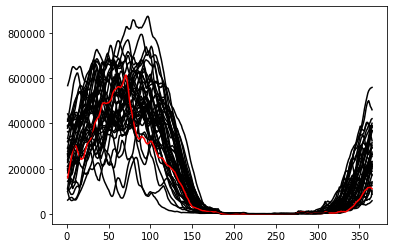

In [5]:
for col in df.columns:
    
    if int(col) == 2020:
        color='r'
    else:
        color='k'
    
    plt.plot(df[col],color=color)

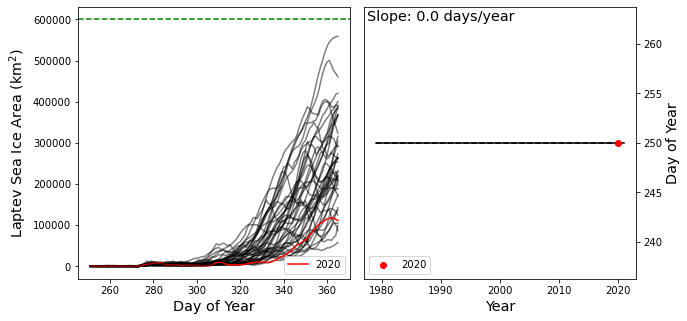

In [6]:
df['doy'] = np.arange(1,df.shape[0]+1)
df.set_index('doy',inplace=True)
df_late = df.iloc[250:]


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

doy_freezeup = []

for col in df.columns:
    
    if int(col) == 2020:
        color='r'; alpha=1
    else:
        color='k'; alpha=0.5
        
    doy_freezeup.append( np.argmax( np.array(df_late[col]) > 600_000) + 250)
    
    ax1.plot(df_late[col],color=color,alpha=alpha)

ax1.axhline(600_000,color='g',ls='--')    

ax2.plot(df.columns[1:-1], doy_freezeup[1:-1],color='k')
ax2.scatter(2020,doy_freezeup[-2],marker='o',color='r',zorder=5,label='2020')

ax1.set_ylabel('Laptev Sea Ice Area (km$^2$)',fontsize='x-large')
ax1.set_xlabel('Day of Year',fontsize='x-large')

ax1.plot([],[],color='r',label='2020')


ax2.set_ylabel('Day of Year',fontsize='x-large')
ax2.set_xlabel('Year',fontsize='x-large')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

ax1.legend(loc='lower right')
ax2.legend(loc='lower left')

stats = linregress(list(df.columns[1:-1]), doy_freezeup[1:-1])

ax2.plot([1979,2020],[1979*stats[0] + stats[1],
                      2020*stats[0] + stats[1]],
         ls='--',color='k')

round_slope = np.round(stats[0],decimals=2)

ax2.annotate(xy=(0.01,0.95),text=f'Slope: {round_slope} days/year',
             fontsize='x-large', xycoords='axes fraction')

plt.subplots_adjust(wspace=0.05)

/home/robbie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


(120.0, 200.0)

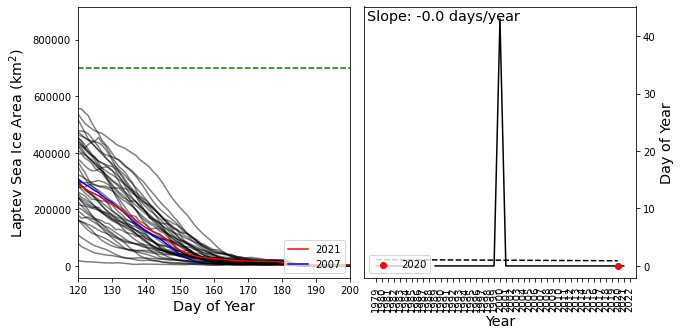

In [7]:
df['doy'] = np.arange(1,df.shape[0]+1)
df.set_index('doy',inplace=True)
df_late = df.iloc[:]


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

doy_meltonset = []

for col in df.columns:
    
    if int(col) == 2021:
        color='r'; alpha=1
    elif int(col) == 2007:
        color='b'; alpha=1
    else:
        color='k'; alpha=0.5
    
    if int(col) != 1988:
        doy_meltonset.append( np.argmin( np.array(df_late[col]) > 500_000))
    else:
        doy_meltonset.append(np.nan)
    
    ax1.plot(df_late[col],color=color,alpha=alpha)

ax1.axhline(700_000,color='g',ls='--')    

ax2.plot(df.columns[1:-1], doy_meltonset[1:-1],color='k')
ax2.scatter(2020,doy_meltonset[-2],marker='o',color='r',zorder=5,label='2020')

ax1.set_ylabel('Laptev Sea Ice Area (km$^2$)',fontsize='x-large')
ax1.set_xlabel('Day of Year',fontsize='x-large')

ax1.plot([],[],color='r',label='2021')
ax1.plot([],[],color='b',label='2007')


ax2.set_ylabel('Day of Year',fontsize='x-large')
ax2.set_xlabel('Year',fontsize='x-large')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

ax1.legend(loc='lower right')
ax2.legend(loc='lower left')

chopped_years = np.array(df.columns[1:]).astype(np.int)
chopped_doys = np.array(doy_meltonset[1:])

stats = linregress(chopped_years[~np.isnan(chopped_doys)],
                    chopped_doys[~np.isnan(chopped_doys)])

ax2.plot([1979,2020],[1979*stats[0] + stats[1],
                      2020*stats[0] + stats[1]],
         ls='--',color='k')

round_slope = np.round(stats[0],decimals=2)

ax2.annotate(xy=(0.01,0.95),text=f'Slope: {round_slope} days/year',
             fontsize='x-large', xycoords='axes fraction')

ax2.set_xticks(chopped_years)
ax2.set_xticklabels(chopped_years,rotation=90)

plt.subplots_adjust(wspace=0.05)

ax1.set_xlim(120,200)

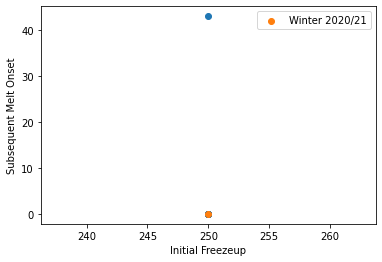

In [8]:
plt.scatter(doy_freezeup[1:-1],doy_meltonset[2:])

plt.scatter(doy_freezeup[-2],doy_meltonset[-1],label='Winter 2020/21')

plt.ylabel('Subsequent Melt Onset')
plt.xlabel('Initial Freezeup')

plt.legend()

In [9]:
plt.scatter(chopped_doys[:-1],anomalies)
plt.scatter(chopped_doys[-15],anomalies[-14],label='2007',color='r')
plt.legend()
plt.ylabel('SIE Minimum Anomaly \nFrom Linear Trend (stds)')
plt.xlabel('Laptev Melt Onset DOY')

NameError: name 'anomalies' is not defined

In [ ]:
mo_anom_stats = linregress(chopped_doys[:-1][~np.isnan(chopped_doys[:-1])],anomalies[~np.isnan(chopped_doys[:-1])])

In [ ]:
df = pd.read_excel('/home/robbie/Dropbox/book_chapter/data/Sea_Ice_Index_Daily_Extent_G02135_v3.0.xlsx',)

# df.drop(index=59,inplace=True)
df.drop(columns=['Unnamed: 0',
                 'Unnamed: 1',
                 ' ',
                 '1981-2010 mean',
                 '1981-2010 median'],
        inplace=True)

df[df.isnull()] = np.nan

df

In [ ]:
timeseries = []

for col in df.columns[:]:
    
    timeseries += list(df[col])
    
timeseries = np.array(timeseries)

timeseries[np.isnan(timeseries)] = np.nan

In [ ]:
x = np.arange(len(timeseries))[~np.isnan(timeseries)]

y = timeseries[~np.isnan(timeseries)]

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(x,y)

ax.set_xticks(np.arange(0,366*44,366))
ax.set_xticklabels(np.arange(1978,2022),rotation=90)

# plt.plot(np.arange(300,350),timeseries[300:350],color='k')

plt.show()

In [ ]:
doy_mins = []
years = []
specials = []

for col in df.columns:
    
    doy_min = np.min(df[col])
    doy_mins.append(doy_min)
    years.append(int(col))
    
    if np.isin(int(col), [2007,2012,2020]):
        specials.append(doy_min)
    
years = years[1:-1]
doy_mins = doy_mins[1:-1]
    
plt.plot(years,doy_mins)
plt.scatter([2007,2012,2020],specials,c=['g','r','b'])
plt.xticks(years[::2],rotation=90)
plt.show()

In [ ]:
for col in df.columns:
    
    if col == 2012:
        color='r'
        alpha=1
    elif col == 2007:
        color='g'
        alpha=1
    elif col == 2020:
        color='b'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    plt.plot(df.index,df[col],color=color,alpha=alpha)

plt.xlim(200,310)
plt.ylim(3.1,11)

# Summary plot

In [ ]:
fig = plt.figure(constrained_layout=True,figsize=(10,8))

gs = fig.add_gridspec(2, 2)

top_ax = fig.add_subplot(gs[0, :])
top_ax.set_title('Arctic Sea Ice Extent', fontsize='xx-large')

top_ax.plot(x,y,color='k')

top_ax.set_xticks(np.arange(0,366*44,366))
top_ax.set_xticklabels(np.arange(1978,2022),rotation=90)

top_ax.xaxis.set_label_position('top') 
top_ax.xaxis.tick_top()
top_ax.yaxis.set_ticks_position('both')
top_ax.xaxis.set_ticks_position('both')


top_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')


#####################################


BL_ax = fig.add_subplot(gs[1, :-1])

for col in df.columns:
    
    if col == 2012:
        color='r'
        alpha=1
    elif col == 2007:
        color='g'
        alpha=1
    elif col == 2020:
        color='b'
        alpha=1
    else:
        color='gray'
        alpha=0.5
    
    BL_ax.plot(df.index,df[col],color=color,alpha=alpha)

BL_ax.set_xlim(200,310)
BL_ax.set_ylim(3.1,11)

BL_ax.set_xlabel('Day of Year', fontsize='x-large')
BL_ax.set_ylabel('SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2007,2012,2020],
                       ['g','r','b']):
    BL_ax.plot([],[],color=color,label=str(year))
BL_ax.legend(loc='lower right')

#####################################

BR_ax = fig.add_subplot(gs[1:, -1])

BR_ax.plot(years,doy_mins,color='k',marker='o')

BR_ax.scatter([2007,2012,2020],specials,c=['g','r','b'],zorder=5,s=50)

BR_ax.yaxis.set_label_position('right') 
BR_ax.yaxis.tick_right()

BR_ax.set_xlabel('Year', fontsize='x-large')
BR_ax.set_ylabel('Minimum SIE (million km$^2$)', fontsize='x-large')

for year, color in zip([2007,2012,2020],
                       ['g','r','b']):
    BR_ax.scatter([],[],color=color,label=str(year))
BR_ax.legend(loc='lower left')



In [ ]:
import pickle
anomalies = pickle.load(open('anomalies.p', 'rb'))